In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import stdev
import scipy.stats as sp
import arch
import statsmodels as sm
from ipywidgets import interact, IntSlider
import warnings
warnings.filterwarnings("ignore")

In [9]:
copper = pd.read_csv('../data/copper.csv')
Y = np.array(copper.Open.values[::-1])
r_copper = np.log(Y[1:] / Y[:-1])

In [10]:
S0 = 8431
r = 0.02
T = 1/4
F = S0 * np.exp(r * T)
F

8473.26056336561

In [11]:
X = S0
sigma = np.sqrt(252) * stdev(r_copper)

C = S0 * sp.norm.cdf( (np.log(S0/X) + (r + sigma**2/2) * T) / sigma * np.sqrt(T) )  -  X * np.exp(-r*T) * sp.norm.cdf( (np.log(S0/X) + (r - sigma**2/2) * T) / sigma * np.sqrt(T) )
C

116.14378151012806

In [6]:
def strategies(futures, premium):

    copper = np.linspace(S0 - 200, S0 + 200, 1000)

    str_1 = S0 - copper
    str_2 = copper - futures
    str_3 = np.vectorize(max)(copper - S0, 0) - premium

    plt.figure(figsize=(10, 6))
    plt.plot(copper, str_1, label='Strategia 1')
    plt.plot(copper, str_2, label='Strategia 2')
    plt.plot(copper, str_3, label='Strategia 3')
    plt.axvline(S0, linestyle='--', c='red')
    plt.grid()
    plt.legend()
    plt.show()

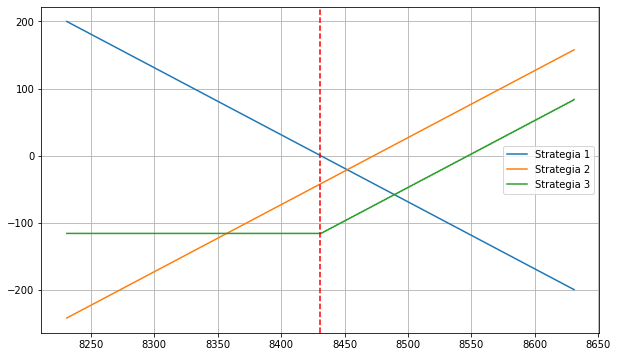

In [12]:
strategies(F, C)

In [14]:
interact(strategies,
        futures = IntSlider(min = 8000, max = 8900, step = 50, value = 8550, description = "Cena wykonania kontraktu forward"),
        premium = IntSlider(min = 0, max = 500, step = 10, value = 100, description = "Premia opcji kupna"))

interactive(children=(IntSlider(value=8550, description='Cena wykonania kontraktu forward', max=8900, min=8000…

<function __main__.strategies(futures, premium)>

# Geometryczy ruch Browna

In [15]:
mu = np.mean(r_copper)
sigma = stdev(r_copper)

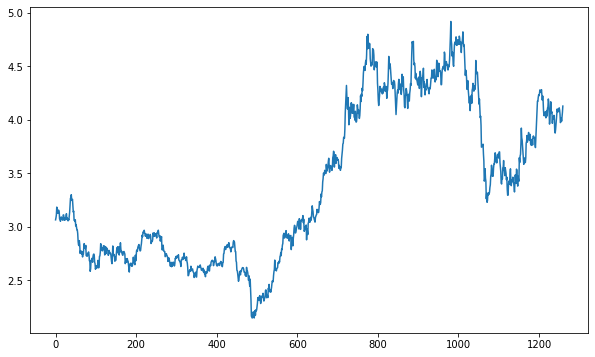

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

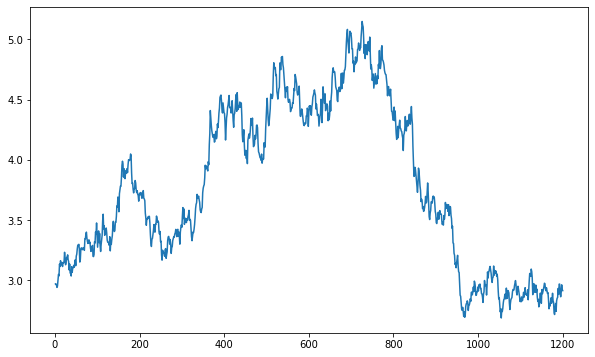

In [17]:
T = 1200
#S0 = 8431
S0 = 3
n = 1000
ts = np.linspace(T/n, T, n)
Bt = np.cumsum(sp.norm.rvs(0, np.sqrt(T/n), n))
St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)

plt.figure(figsize=(10, 6))
plt.plot(ts, St)
plt.show()

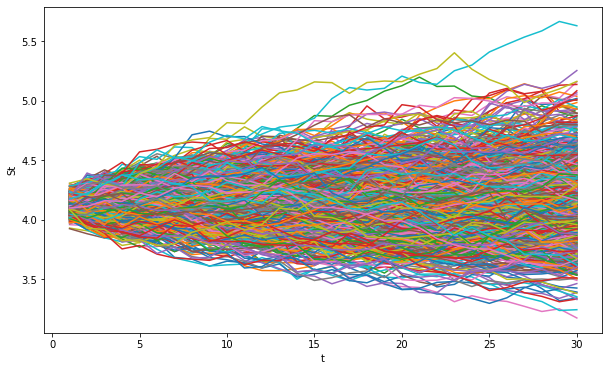

In [26]:
T = 30
S0 = Y[-1]
n = 30
ts = np.linspace(T/n, T, n)

plt.figure(figsize=(10, 6))
MC = 1000
St_table = np.zeros((n, MC))
for i in range(MC):
    Bt = np.cumsum(sp.norm.rvs(0, np.sqrt(T/n), n))
    St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)
    St_table[:, i] = St
    plt.plot(ts, St)

plt.xlabel("t")
plt.ylabel("St")
plt.show()

In [12]:
T = 30
S0 = Y[-1]
n = 30
ts = np.linspace(T/n, T, n)

MC = 10000
St_table = np.zeros((n, MC))
for i in range(MC):
    Bt = np.cumsum(sp.norm.rvs(0, np.sqrt(T/n), n))
    St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)
    St_table[:, i] = St

print(np.quantile(St_table[-1,:], 0.95))
print(np.quantile(St_table[-1,:], 0.99))

4.710848876567018
4.957549154614794


In [13]:
loc = S0 * np.exp(mu * 30)
s = S0**2 * np.exp(2 * mu * 30) * (np.exp(sigma**2 * 30) - 1)

print(sp.lognorm.ppf(0.95, s=np.sqrt(s), loc=loc, scale=1))
print(sp.lognorm.ppf(0.99, s=np.sqrt(s), loc=loc, scale=1))

5.86541238486236
6.2891432540904795


In [14]:
loc = np.log(S0) + (mu - 1/2 * sigma**2) * 30
s = sigma * np.sqrt(30)

print(sp.lognorm.ppf(0.95, s=s, loc=loc, scale=1))
print(sp.lognorm.ppf(0.99, s=s, loc=loc, scale=1))

2.5590633045532742
2.621232786814546
